# Phần 2: Lọc ảnh với Low-pass và High-pass Filter

## Import thư viện

In [178]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Hàm dùng để hiển thị ảnh

In [179]:
def show_plt(title, img):
    plt.title(title)
    plt.axis("off")

    # Ảnh xám
    if img.ndim == 2:
        plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    else:
        # Ảnh màu
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_img)

## Load ảnh đầu vào

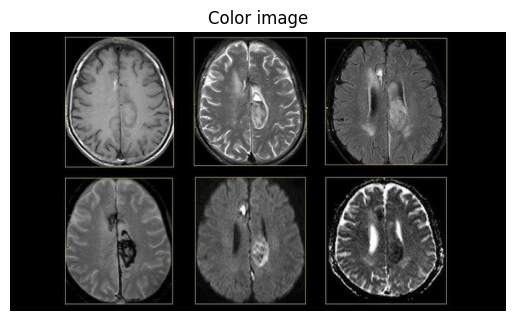

In [180]:
# img = "lowcontrast.jpg"
# img = "mri.jpg"
# img = "pcb.jpg"
# img = "cv_img1.jpg"

img = cv2.imread("mri.jpg", cv2.IMREAD_COLOR)
show_plt("Color image", img)

## Chuyển ảnh màu sang ảnh xám

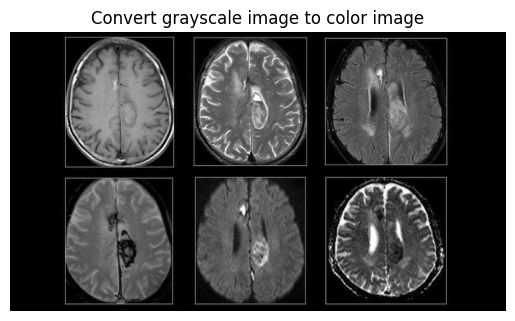

In [181]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_plt("Convert grayscale image to color image", gray_img)

## Low-Pass Filters

### Mean Filter

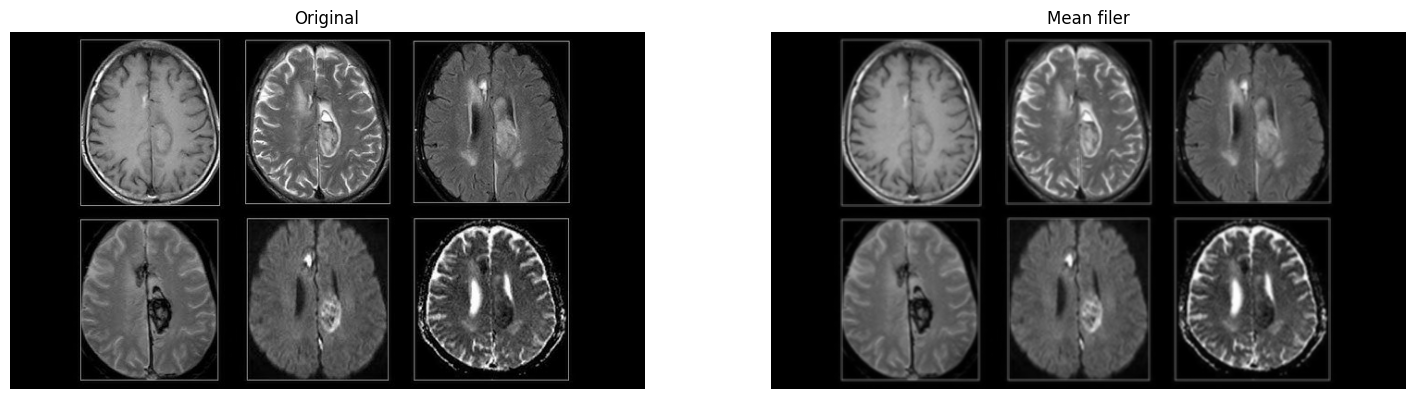

In [182]:
# Kernel
kernel_size = 3
kernel = np.ones((kernel_size, kernel_size), np.float32)/(kernel_size**2)

# Convolution
img_mean = cv2.filter2D(gray_img, -1, kernel)

# Hiển thị
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
show_plt("Original", gray_img)
plt.subplot(1,2,2)
show_plt("Mean filer", img_mean)

### Median Fitler

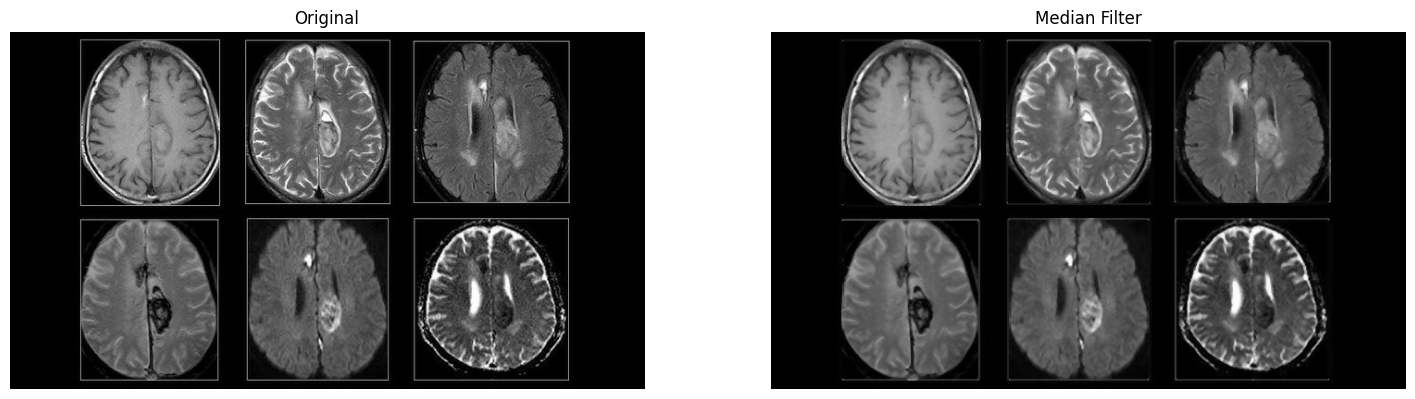

In [183]:
# Kernel
kernel_size = 3
img_median = cv2.medianBlur(gray_img, kernel_size)

# Hiển thị
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
show_plt("Original", gray_img)
plt.subplot(1,2,2)
show_plt("Median Filter", img_median)

### Gaussian Filter

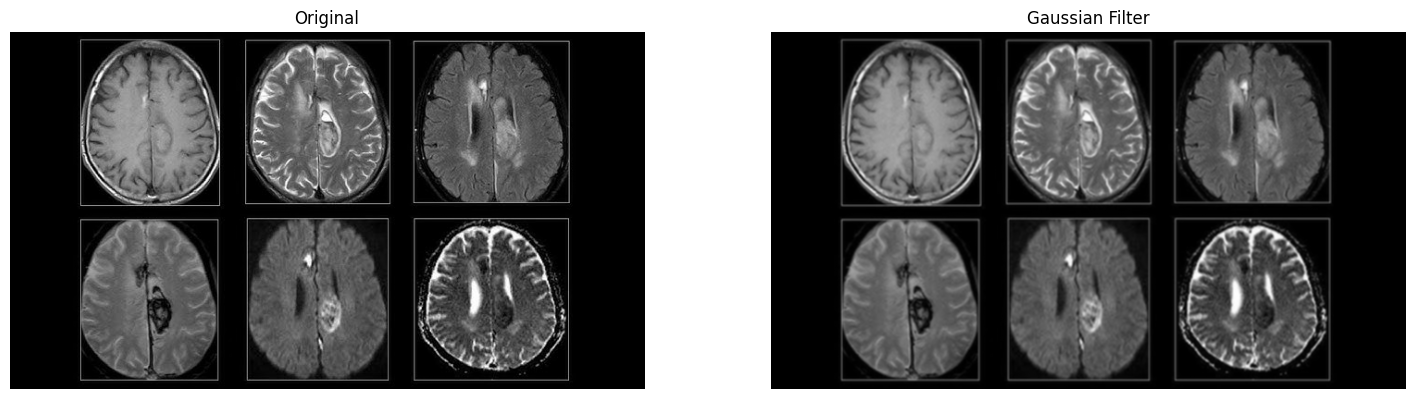

In [184]:
# Kernel
kernel = (3, 3)
img_gaussian = cv2.GaussianBlur(src=gray_img, ksize=kernel, sigmaX=1)

# Hiển thị
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
show_plt("Original", gray_img)
plt.subplot(1,2,2)
show_plt("Gaussian Filter", img_gaussian)

## High-Pass Filters

#### Áp dụng gaussian filter trước khi high-pass filter (tuỳ chọn)

In [185]:
blurred_image = cv2.GaussianBlur(src=gray_img, ksize=kernel, sigmaX=1)

### Sobel Filter

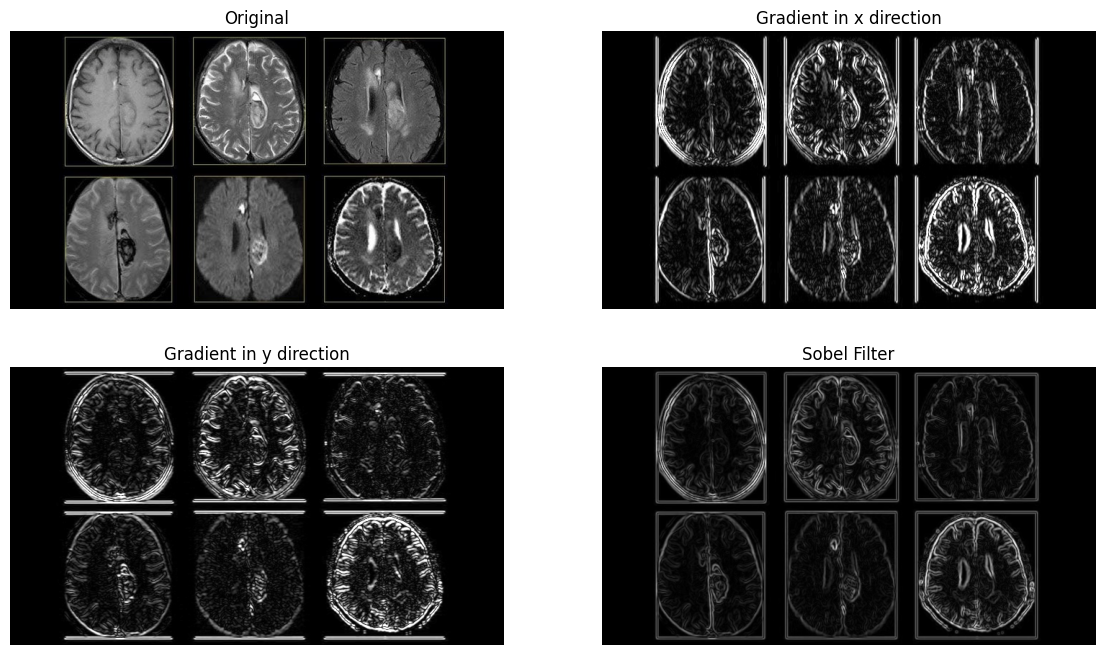

In [186]:
# Kernel
kernel_size = 3

Hx = cv2.Sobel(blurred_image, cv2.CV_32F, 1, 0, ksize=3)
Hy = cv2.Sobel(blurred_image, cv2.CV_32F, 0, 1, ksize=3)

# Gradient magnitude
H = np.sqrt(Hx**2 + Hy**2)

# Normalize to range 0-255
Hx = cv2.convertScaleAbs(Hx)
Hy = cv2.convertScaleAbs(Hy)
H = np.uint8(255 * H / np.max(H))

# Hiển thị
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
show_plt("Original", img)

plt.subplot(2,2,2)
show_plt("Gradient in x direction", Hx)

plt.subplot(2,2,3)
show_plt("Gradient in y direction", Hy)

plt.subplot(2,2,4)
show_plt("Sobel Filter", H)

### Prewitt Filter

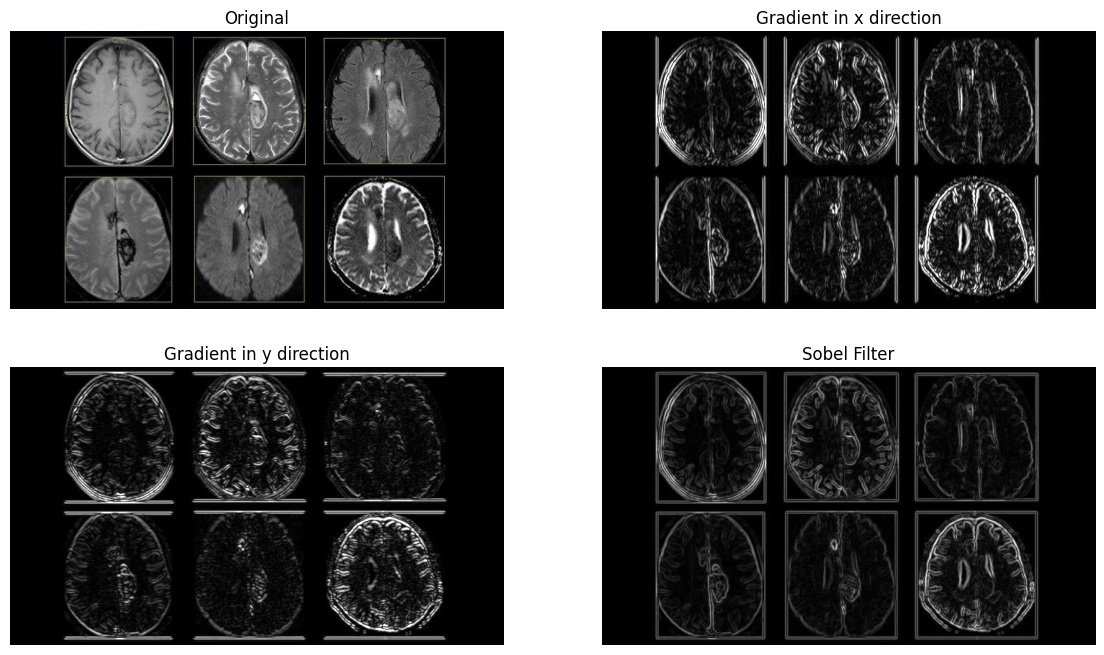

In [187]:
# Kernel
Hx = np.array([[1, 0, -1],
               [1, 0, -1],
               [1, 0, -1]], dtype=np.float32)

Hy = np.array([[-1, -1, -1],
               [0 , 0 , 0],
               [1 , 1 , 1]], dtype=np.float32)

# Convolution
horizontal = cv2.filter2D(blurred_image, cv2.CV_32F, Hx)
vertical   = cv2.filter2D(blurred_image, cv2.CV_32F, Hy)

# Gradient magnitude
H = np.sqrt(horizontal**2 + vertical**2)

# Normalize to range 0-255
horizontal = cv2.convertScaleAbs(horizontal)
vertical = cv2.convertScaleAbs(vertical)
H = np.uint8(255 * H / np.max(H))

# Hiển thị
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
show_plt("Original", img)

plt.subplot(2,2,2)
show_plt("Gradient in x direction", horizontal)

plt.subplot(2,2,3)
show_plt("Gradient in y direction", vertical)

plt.subplot(2,2,4)
show_plt("Sobel Filter", H)

### Laplacian Filter

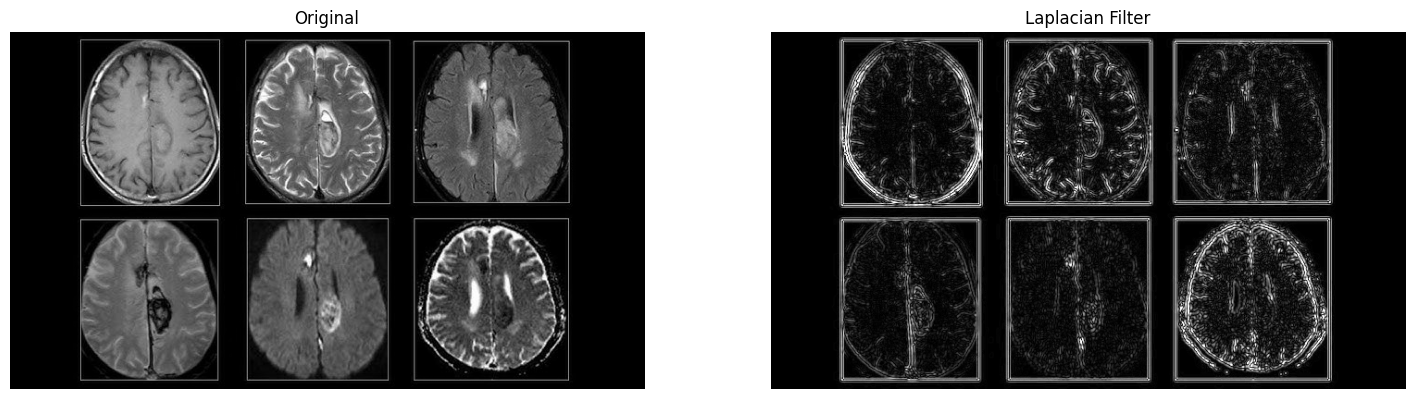

In [188]:
laplacian = cv2.Laplacian(blurred_image, cv2.CV_32F, ksize=3)

# Normalize to range 0-255
laplacian = cv2.convertScaleAbs(laplacian)

# Hiển thị
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
show_plt("Original", gray_img)
plt.subplot(1,2,2)
show_plt("Laplacian Filter", laplacian)